In [226]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt 
import os 

In [227]:
#name and path of images to be loaded 
image_names = ['test1.jpg', 'test2.jpg','test3.jpg','test4.jpg','test5.jpg','test6.jpg']
path = 'skin_test_imgs'

In [228]:
def show_with_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(5, 6, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")
    
# create a figure() object with appropriate size and set title:
plt.figure(figsize=(25, 18))
plt.suptitle("Skin segmentation using different color spaces", fontsize=14, fontweight='bold')


Text(0.5, 0.98, 'Skin segmentation using different color spaces')

<Figure size 1800x1296 with 0 Axes>

In [229]:
def load_all_test_images():

    skin_images = []
    for index_image, name_image in enumerate(image_names):

        #building the relative path where images are
        image_path = os.path.join(path, name_image)

        skin_images.append(cv2.imread(image_path))
    return skin_images

In [230]:
# Show all the images of the array creating the name for each one
def show_images(array_img, title, pos):
    """Shows all the images contained in the array"""

    for index_image, image in enumerate(array_img):
        show_with_plt(image, title + "_" + str(index_image + 1), pos + index_image)


###### Lower and Upper boundaries for the HSV skin segmentation method:

In [231]:
lower_hsv = np.array([0, 48, 80], dtype="uint8")
upper_hsv = np.array([20, 255, 255], dtype="uint8")


``cv2.inRange()`` checks whether the elements
contained in an array lie between the elements of LOWER and UPPER boundary array

In [232]:
def skin_detector_hsv(bgr_image):
    
    """Skin Segmentation algorithm based on the HSV color space"""
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

    #find region with skin tone in HSV image
    skin_region = cv2.inRange(hsv_image, lower_hsv, upper_hsv)
    return skin_region

In [233]:
#lower and upper boundary array for second segmentation

lower_hsv_2 = np.array([0, 50, 0], dtype="uint8")
upper_hsv_2 = np.array([120, 150, 255], dtype="uint8")

In [234]:
def skin_detector_hsv_2(bgr_image):

    hsv_image_2= cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

    skin_region_2 = cv2.inRange(hsv_image_2, lower_hsv_2, upper_hsv_2)
    return skin_region_2

``YCrCb`` Skin Segmentation

In [235]:
lower_ycrcb = np.array([0, 133, 77], dtype="uint8")
upper_ycrcb = np.array([255, 173, 127], dtype="uint8")

In [236]:
def skin_detector_ycrcb(bgr_image):

    ycrcb_image = cv2.cvtColor(bgr_image,cv2.COLOR_BGR2YCR_CB)

    skin_region = cv2.inRange(ycrcb_image, lower_ycrcb, upper_ycrcb)
    return skin_region

In [237]:
# Values are taken from: 'RGB-H-CbCr Skin Colour Model for Human Face Detection'
# (R > 95) AND (G > 40) AND (B > 20) AND (max{R, G, B} − min{R, G, B} > 15) AND (|R − G| > 15) AND (R > G) AND (R > B)
# (R > 220) AND (G > 210) AND (B > 170) AND (|R − G| ≤ 15) AND (R > B) AND (G > B)

def bgr_skin(b, g, r):
    """Rule for skin pixel segmentation based on the paper 'RGB-H-CbCr Skin Colour Model for Human Face Detection'"""

    e1 = bool((r > 95) and (g > 40) and (b > 20) and ((max(r, max(g, b)) - min(r, min(g, b))) > 15) and (
            abs(int(r) - int(g)) > 15) and (r > g) and (r > b))
    e2 = bool((r > 220) and (g > 210) and (b > 170) and (abs(int(r) - int(g)) <= 15) and (r > b) and (g > b))
    return e1 or e2

In [238]:
# Skin detector based on the BGR color space
def skin_detector_bgr(bgr_image):
    """Skin segmentation based on the RGB color space"""

    h = bgr_image.shape[0]
    w = bgr_image.shape[1]

    # We crete the result image with back background
    res = np.zeros((h, w, 1), dtype="uint8")

    # Only 'skin pixels' will be set to white (255) in the res image:
    for y in range(0, h):
        for x in range(0, w):
            (b, g, r) = bgr_image[y, x]
            if bgr_skin(b, g, r):
                res[y, x] = 255

    return res

Dictionary of Skin Detectors to be used

In [239]:
skin_detectors = {
    'ycrcb': skin_detector_ycrcb,
    'hsv': skin_detector_hsv,
    'hsv_2': skin_detector_hsv_2,
    'bgr': skin_detector_bgr
}

In [240]:
def apply_skin_detector(array_img, skin_detector):

    skin_detector_result = []

    for index_image, image in enumerate(array_img):
        detected_skin = skin_detectors[skin_detector](image)
        bgr = cv2.cvtColor(detected_skin, cv2.COLOR_GRAY2BGR)
        skin_detector_result.append(bgr)
    
    return skin_detector_result

index: '0', key: 'ycrcb', value: '<function skin_detector_ycrcb at 0x000001CBA508BF70>'
index: '1', key: 'hsv', value: '<function skin_detector_hsv at 0x000001CBA54840D0>'
index: '2', key: 'hsv_2', value: '<function skin_detector_hsv_2 at 0x000001CBA508BEE0>'
index: '3', key: 'bgr', value: '<function skin_detector_bgr at 0x000001CBA46658B0>'


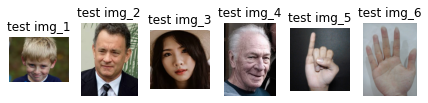

In [241]:
# Show the skin_detectors dictionary
# This is only for debugging purposes
for i, (k, v) in enumerate(skin_detectors.items()):
    print("index: '{}', key: '{}', value: '{}'".format(i, k, v))

# We load all the test images:
test_images = load_all_test_images()

# We plot the test images:
show_images(test_images, "test img", 1)

plt.tight_layout()
plt.subplots_adjust(top=1.5, hspace=0.2)

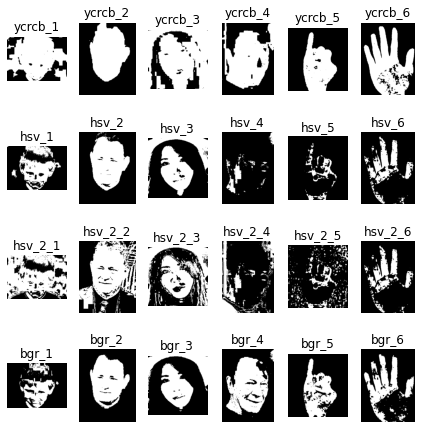

In [244]:
# For each skin detector we apply and show all the test images:
show_images(apply_skin_detector(test_images, 'ycrcb'), "ycrcb", 7)
show_images(apply_skin_detector(test_images, 'hsv'), "hsv", 13)
show_images(apply_skin_detector(test_images, 'hsv_2'), "hsv_2", 19)
show_images(apply_skin_detector(test_images, 'bgr'), "bgr", 25)

plt.tight_layout()
plt.subplots_adjust(top=1.8, hspace=0.5)
# Show the created image:
plt.show()